### 1. Image Quantization (Uniform):
Write your own program in Python/Matlab which works as image quantizer. Take any 8-bit grayscale image as input. Without using any pre-defined function, quantize it into 
- 	64 levels (=L)
-	32 levels
-	16 levels
-	4 levels
-	Use direct function in Python or Matlab such as im.quantize in Matlab and match the result with the output of your code in above parts
-	Find the Mean Square Error for parts a)-d). For this, you can take the difference of input and output image which will give you error. Then take square of the error and then mean. Comment on the image quality as you vary L.


In [174]:
#imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [175]:
#reading image with PIL, converting to grayscale and then converting to np array
img = Image.open('images/Images1/bird.png').convert('LA')
img = np.asarray(img)
print(img.shape)
print(img.max(), img.min())

(324, 410, 2)
255 0


In [176]:
#defining quantization function
import math
Q = lambda F, F_min, q : math.floor((F - F_min)/q)*q + q/2 + F_min
def Q_arr(F, F_min, q):
    l = []
    for i in F:
        l.append(Q(i, F_min, q))
    return np.array(l, dtype='uint8')
q = lambda f_max, f_min, levels : (f_max-f_min)/levels 

In [177]:
#quantizing image with given levels

f_max = img.max()
f_min = img.min()
levels = [64, 32, 16, 4]
imgs = []
for l in levels:
    q_in = math.ceil(q(f_max, f_min, l))
    imgs.append(np.apply_along_axis(lambda i : Q_arr(i, f_min, q_in), 2, img))

In [178]:
#displaying with decreasing levels of quantization
def displayQuant(imgs):    
    f, axs = plt.subplots(2,2)
    i,j=0,0
    for img in imgs:
        if j > 1:
            i+=1
            j=0
        axs[i,j].imshow(Image.fromarray(img).convert('L'), cmap="gray")
        j+=1

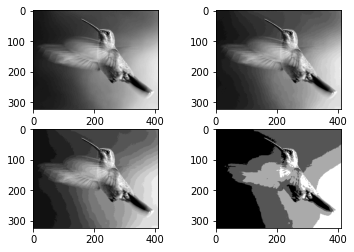

In [179]:
displayQuant(imgs)

In [180]:
#using direct function
img = Image.open('images/Images1/bird.png')
imgs_auto = []
for l in levels:
    imgs_auto.append(np.array(img.quantize(colors = (255//l))))

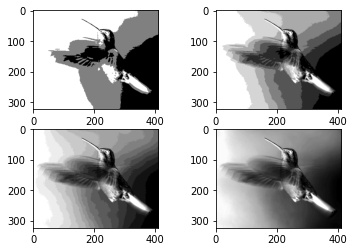

In [181]:
displayQuant(imgs_auto)

In [185]:
#mean square error
ref = np.array(img.convert('LA'))

for i in range(len(levels)):
    mse = np.sum((imgs[i] - ref)**2)/ref.size
    print(f'Mean squared error with {levels[i]} levels is {mse}')

Mean squared error with 64 levels is 1.25766711833785
Mean squared error with 32 levels is 7.2782482685937975
Mean squared error with 16 levels is 34.89622478169226
Mean squared error with 4 levels is 138.33585140018067


### 2. Distance Measures:
Write a program to compute following distance transforms of the binary image b. First convert grayscale image to binary image. This can be done by setting a threshold such as 0 can be assigned to intensity values <= r and 1 is assigned to intensity values > r where you can choose any value of r from range of intensity values in grayscale image.
##### -	Euclidean distance
##### -	City- block distance
##### -	Chessboard distance


1.0

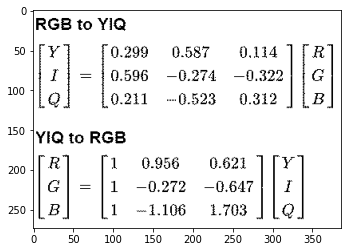

In [283]:
#getting image

image = np.array(Image.open('images/Images1/rgbyiq.png').convert('1'), dtype = 'float64')

#checking if read properly
plt.imshow(image, cmap='gray')
image[1,0]
#index = [(-1, 0), (0, 1), (1, 0), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
#new = [index for index in index if validityCheck(index[0], index[1], image.shape[0], image.shape[1]) == True and validityCheckNonZero == True]
#print(new)

Invalid index: (-1, 0)
Invalid index: (0, -1)
Invalid index: (-1, -1)
Invalid index: (1, -1)
Invalid index: (-1, 1)
Invalid index: (-1, 1)
Invalid index: (-1, 0)
Invalid index: (-1, 2)
Invalid index: (-1, 2)
Invalid index: (-1, 1)
Invalid index: (-1, 3)
Invalid index: (-1, 3)
Invalid index: (-1, 2)
Invalid index: (-1, 4)
Invalid index: (-1, 4)
Invalid index: (-1, 3)
Invalid index: (-1, 5)
Invalid index: (-1, 5)
Invalid index: (-1, 4)
Invalid index: (-1, 6)
Invalid index: (-1, 6)
Invalid index: (-1, 5)
Invalid index: (-1, 7)
Invalid index: (-1, 7)
Invalid index: (-1, 6)
Invalid index: (-1, 8)
Invalid index: (-1, 8)
Invalid index: (-1, 7)
Invalid index: (-1, 9)
Invalid index: (-1, 9)
Invalid index: (-1, 8)
Invalid index: (-1, 10)
Invalid index: (-1, 10)
Invalid index: (-1, 9)
Invalid index: (-1, 11)
Invalid index: (-1, 11)
Invalid index: (-1, 10)
Invalid index: (-1, 12)
Invalid index: (-1, 12)
Invalid index: (-1, 11)
Invalid index: (-1, 13)
Invalid index: (-1, 13)
Invalid index: (-1, 12)

Invalid index: (10, 386)
Invalid index: (11, 386)
Invalid index: (9, 386)
Invalid index: (11, -1)
Invalid index: (10, -1)
Invalid index: (12, -1)
Invalid index: (11, 386)
Invalid index: (12, 386)
Invalid index: (10, 386)
Invalid index: (12, -1)
Invalid index: (11, -1)
Invalid index: (13, -1)
Invalid index: (12, 386)
Invalid index: (13, 386)
Invalid index: (11, 386)
Invalid index: (13, -1)
Invalid index: (12, -1)
Invalid index: (14, -1)
Invalid index: (13, 386)
Invalid index: (14, 386)
Invalid index: (12, 386)
Invalid index: (14, -1)
Invalid index: (13, -1)
Invalid index: (15, -1)
Invalid index: (14, 386)
Invalid index: (15, 386)
Invalid index: (13, 386)
Invalid index: (15, -1)
Invalid index: (14, -1)
Invalid index: (16, -1)
Invalid index: (15, 386)
Invalid index: (16, 386)
Invalid index: (14, 386)
Invalid index: (16, -1)
Invalid index: (15, -1)
Invalid index: (17, -1)
Invalid index: (16, 386)
Invalid index: (17, 386)
Invalid index: (15, 386)
Invalid index: (17, -1)
Invalid index: (16, 

Invalid index: (80, 386)
Invalid index: (81, 386)
Invalid index: (79, 386)
Invalid index: (81, -1)
Invalid index: (80, -1)
Invalid index: (82, -1)
Invalid index: (81, 386)
Invalid index: (82, 386)
Invalid index: (80, 386)
Invalid index: (82, -1)
Invalid index: (81, -1)
Invalid index: (83, -1)
Invalid index: (82, 386)
Invalid index: (83, 386)
Invalid index: (81, 386)
Invalid index: (83, -1)
Invalid index: (82, -1)
Invalid index: (84, -1)
Invalid index: (83, 386)
Invalid index: (84, 386)
Invalid index: (82, 386)
Invalid index: (84, -1)
Invalid index: (83, -1)
Invalid index: (85, -1)
Invalid index: (84, 386)
Invalid index: (85, 386)
Invalid index: (83, 386)
Invalid index: (85, -1)
Invalid index: (84, -1)
Invalid index: (86, -1)
Invalid index: (85, 386)
Invalid index: (86, 386)
Invalid index: (84, 386)
Invalid index: (86, -1)
Invalid index: (85, -1)
Invalid index: (87, -1)
Invalid index: (86, 386)
Invalid index: (87, 386)
Invalid index: (85, 386)
Invalid index: (87, -1)
Invalid index: (86,

Invalid index: (157, -1)
Invalid index: (156, 386)
Invalid index: (157, 386)
Invalid index: (155, 386)
Invalid index: (157, -1)
Invalid index: (156, -1)
Invalid index: (158, -1)
Invalid index: (157, 386)
Invalid index: (158, 386)
Invalid index: (156, 386)
Invalid index: (158, -1)
Invalid index: (157, -1)
Invalid index: (159, -1)
Invalid index: (158, 386)
Invalid index: (159, 386)
Invalid index: (157, 386)
Invalid index: (159, -1)
Invalid index: (158, -1)
Invalid index: (160, -1)
Invalid index: (159, 386)
Invalid index: (160, 386)
Invalid index: (158, 386)
Invalid index: (160, -1)
Invalid index: (159, -1)
Invalid index: (161, -1)
Invalid index: (160, 386)
Invalid index: (161, 386)
Invalid index: (159, 386)
Invalid index: (161, -1)
Invalid index: (160, -1)
Invalid index: (162, -1)
Invalid index: (161, 386)
Invalid index: (162, 386)
Invalid index: (160, 386)
Invalid index: (162, -1)
Invalid index: (161, -1)
Invalid index: (163, -1)
Invalid index: (162, 386)
Invalid index: (163, 386)
Inval

Invalid index: (230, 386)
Invalid index: (231, 386)
Invalid index: (229, 386)
Invalid index: (231, -1)
Invalid index: (230, -1)
Invalid index: (232, -1)
Invalid index: (231, 386)
Invalid index: (232, 386)
Invalid index: (230, 386)
Invalid index: (232, -1)
Invalid index: (231, -1)
Invalid index: (233, -1)
Invalid index: (232, 386)
Invalid index: (233, 386)
Invalid index: (231, 386)
Invalid index: (233, -1)
Invalid index: (232, -1)
Invalid index: (234, -1)
Invalid index: (233, 386)
Invalid index: (234, 386)
Invalid index: (232, 386)
Invalid index: (234, -1)
Invalid index: (233, -1)
Invalid index: (235, -1)
Invalid index: (234, 386)
Invalid index: (235, 386)
Invalid index: (233, 386)
Invalid index: (235, -1)
Invalid index: (234, -1)
Invalid index: (236, -1)
Invalid index: (235, 386)
Invalid index: (236, 386)
Invalid index: (234, 386)
Invalid index: (236, -1)
Invalid index: (235, -1)
Invalid index: (237, -1)
Invalid index: (236, 386)
Invalid index: (237, 386)
Invalid index: (235, 386)
Inva

Invalid index: (273, 267)
Invalid index: (273, 268)
Invalid index: (273, 266)
Invalid index: (273, 268)
Invalid index: (273, 269)
Invalid index: (273, 267)
Invalid index: (273, 269)
Invalid index: (273, 270)
Invalid index: (273, 268)
Invalid index: (273, 270)
Invalid index: (273, 271)
Invalid index: (273, 269)
Invalid index: (273, 271)
Invalid index: (273, 272)
Invalid index: (273, 270)
Invalid index: (273, 272)
Invalid index: (273, 273)
Invalid index: (273, 271)
Invalid index: (273, 273)
Invalid index: (273, 274)
Invalid index: (273, 272)
Invalid index: (273, 274)
Invalid index: (273, 275)
Invalid index: (273, 273)
Invalid index: (273, 275)
Invalid index: (273, 276)
Invalid index: (273, 274)
Invalid index: (273, 276)
Invalid index: (273, 277)
Invalid index: (273, 275)
Invalid index: (273, 277)
Invalid index: (273, 278)
Invalid index: (273, 276)
Invalid index: (273, 278)
Invalid index: (273, 279)
Invalid index: (273, 277)
Invalid index: (273, 279)
Invalid index: (273, 280)
Invalid inde

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

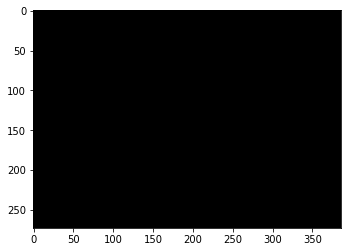

In [288]:
#Euclidean distance

euclidean = lambda x1, y1, x2, y2 : math.sqrt((x1-x2)**2 + (y1-y2)**2)

validityCheckIndex = lambda i, j, l, b : False if i > l - 1 or i < 0 or j > b - 1 or j < 0 else True

validityCheckNonZero = lambda i, j : True if image[i,j] == 1 else False

def getValidIndices(i, j, l, b):
    indices = [(i-1, j) , (i, j+1) , (i+1, j) , (i, j-1), (i+1, j+1), (i-1, j-1), (i+1, j-1), (i-1, j+1)]
    out = []
    #indices = [index for index in indices if validityCheck(index[0], index[1], l, b) == True and validityCheckNonZero == True]
    for index in indices:
        if validityCheckIndex(index[0], index[1], l, b) == False or validityCheckNonZero(index[0], index[1]) == False:
            print(f'Invalid index: {index}')
        else:
            out.append(index)
            #print(f'Valid index: {index}')
    #print(out)
    return out

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        indices = getValidIndices(i, j, image.shape[0], image.shape[1])
        #print(list(map(lambda x : euclidean(x[0], x[1], i, j), indices)))
        image[i,j] = min(list(map(lambda x : euclidean(x[0], x[1], i, j), indices)))
        
plt.imshow(image, cmap='gray')
image